# Setup

In [1]:
import os
# from fk import params
# from fk import model
# from fk import convert
# from fk import stimulus
import matplotlib.pyplot as plt
import jax
import jax.numpy as np



# Instead of importing model
import os

os.chdir("../fk")

import model
import stimulus
import plot
import convert
import params

os.chdir("../tests")
# 

# Parameters

(1200, 1200)
real tissue size: (12, 12)
{'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


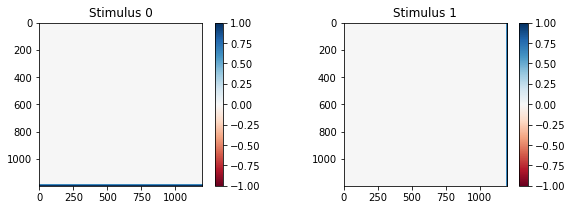

In [11]:
# simulation inputs (real values)
field_size = (12, 12)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = params.params1a()

# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

# to computational units
shape = convert.realsize_to_shape(field_size, dx)

stripe_size = int(shape[0] / 100)

protocol1 = stimulus.protocol(start=0, duration=100, period=0)
s1 = stimulus.rectangular(shape, (shape[0]-stripe_size/2,shape[0]/2), (stripe_size, shape[1]), 1., protocol1)

protocol2 = stimulus.protocol(start=10000, duration=100, period=0)
s2 = stimulus.rectangular(shape, (shape[1]/2, shape[0]-stripe_size/2), (shape[1], stripe_size), 1., protocol2)

# protocol3 = stimulus.protocol(start=20000, duration=2, period=0)
# s3 = stimulus.rectangular(shape, jax.ops.index[stripe_size*2:stripe_size*4, stripe_size*2:stripe_size*4], 1., protocol3)

# protocol4 = stimulus.protocol(start=30000, duration=2, period=0)
# s4 = stimulus.rectangular(shape, jax.ops.index[stripe_size*4:stripe_size*5, :], 1., protocol4)

stimuli = [s1, s2]

print(shape)
print("real tissue size:", field_size)
print(cell_parameters)
plot.show_stimuli(*stimuli)

100


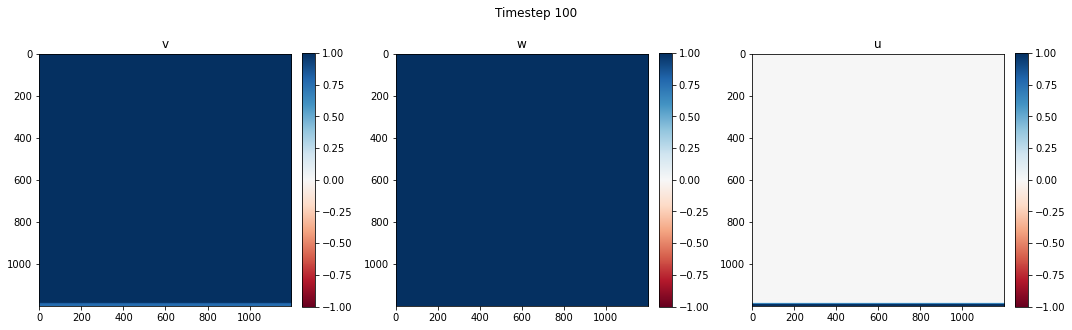

200


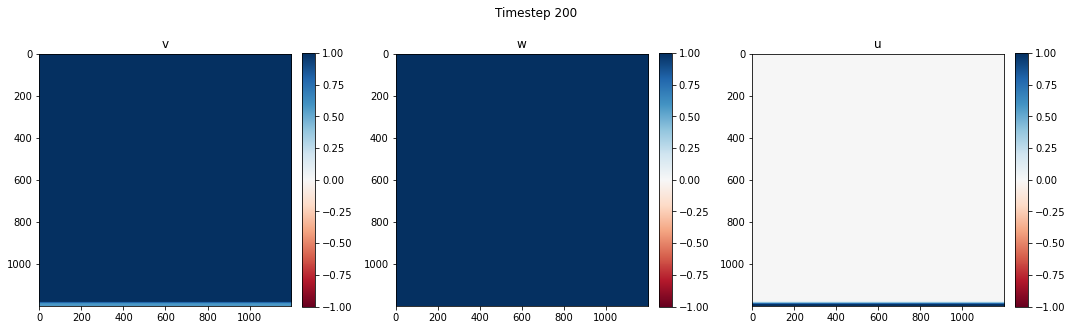

300


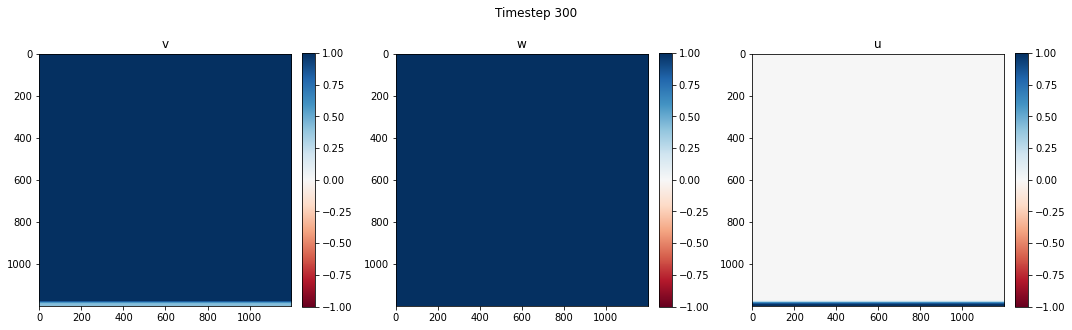

In [68]:
checkpoints = [0, 100,200,300]
probes_list = [(1100,600)]
state = model.init(shape)
probes = [np.ones(len(checkpoints)-1)]*len(probes_list)
for i in range(len(checkpoints) - 1):
    state = model._forward(state, checkpoints[i], checkpoints[i + 1], cell_parameters, np.ones(shape) * d, stimuli, dt, dx)  # dt = 10000
    for p in range(len(probes)):
            x_probe,y_probe = probes_list[p]
            val = state[2][x_probe,y_probe]
            probes[p] = jax.ops.index_update(probes[p], i, val)
    print(checkpoints[i + 1])
    plot.show(state, timestep=checkpoints[i+1])

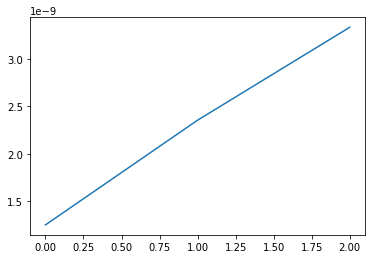

/opt/anaconda3/envs/cardio/lib/python3.7/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


(1200, 1200)
real tissue size: (12, 12)
{'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 2}


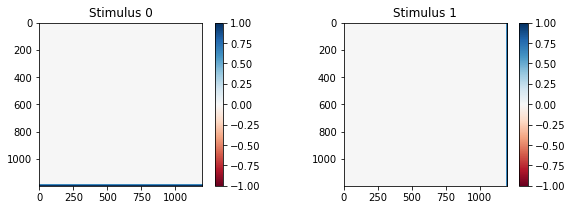

Updated!
1000


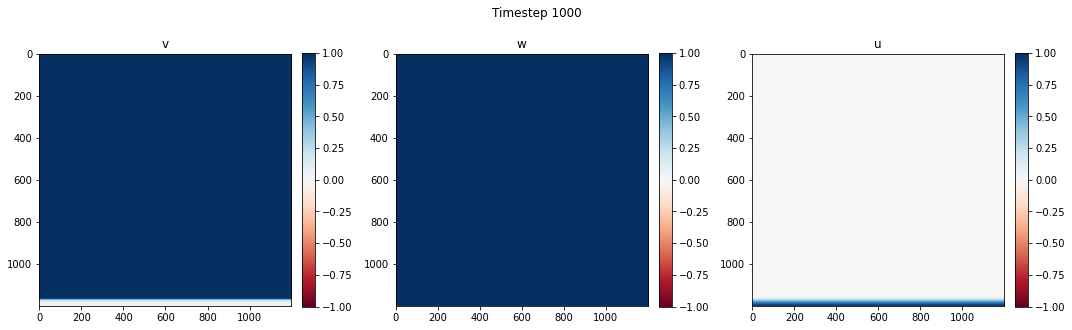

2000


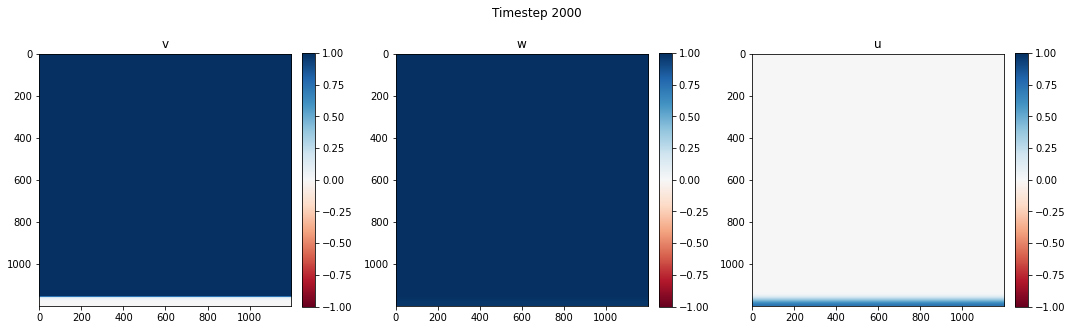

5000


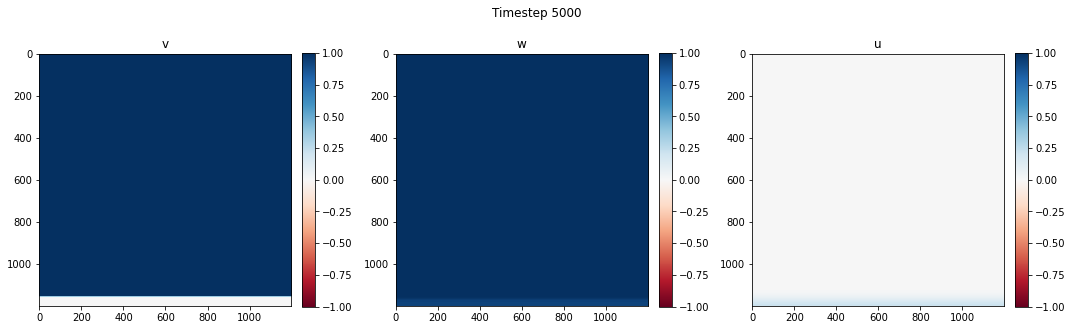

10000


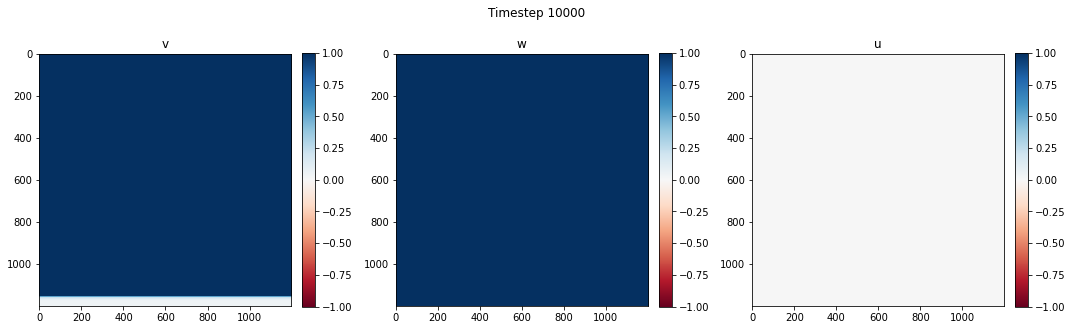

11000


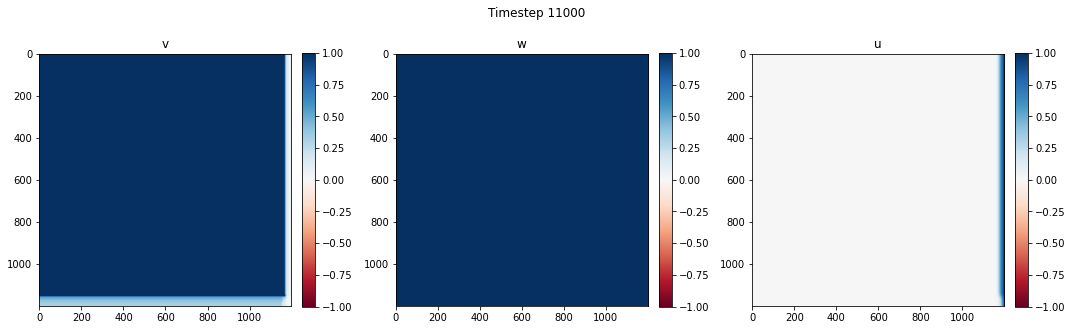

12000


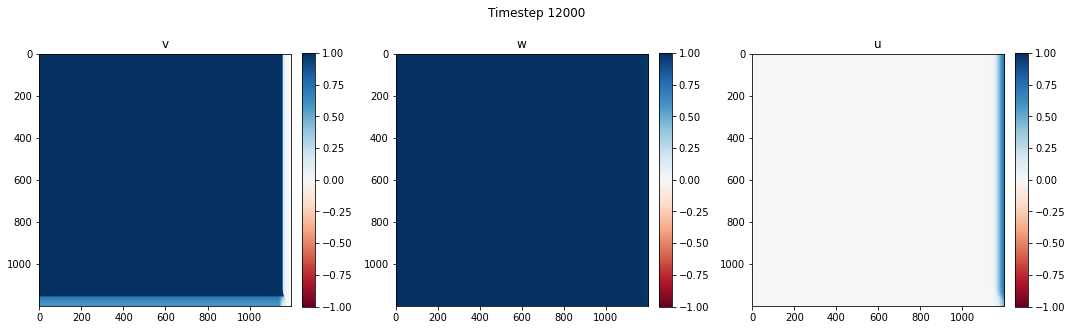

15000


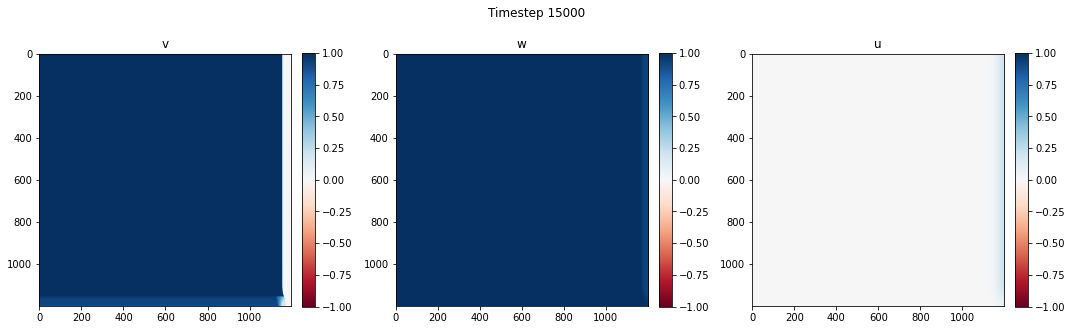

In [2]:
# simulation inputs (real values)
field_size = (12, 12)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = params.params1a()
cell_parameters['Cm']=2

# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

# to computational units
shape = convert.realsize_to_shape(field_size, dx)

stripe_size = int(shape[0] / 100)

protocol1 = stimulus.protocol(start=0, duration=100, period=0)
s1 = stimulus.rectangular(shape, (shape[0]-stripe_size/2,shape[0]/2), (stripe_size, shape[1]), 1., protocol1)

protocol2 = stimulus.protocol(start=10000, duration=100, period=0)
s2 = stimulus.rectangular(shape, (shape[1]/2, shape[0]-stripe_size/2), (shape[1], stripe_size), 1., protocol2)

# protocol3 = stimulus.protocol(start=20000, duration=2, period=0)
# s3 = stimulus.rectangular(shape, jax.ops.index[stripe_size*2:stripe_size*4, stripe_size*2:stripe_size*4], 1., protocol3)

# protocol4 = stimulus.protocol(start=30000, duration=2, period=0)
# s4 = stimulus.rectangular(shape, jax.ops.index[stripe_size*4:stripe_size*5, :], 1., protocol4)

stimuli = [s1, s2]

print(shape)
print("real tissue size:", field_size)
print(cell_parameters)
plot.show_stimuli(*stimuli)

checkpoints = [0, 1000, 2000,5000, 10000, 11000, 12000, 15000]
state = model.init(shape)
for i in range(len(checkpoints) - 1):
    state = model._forward(state, checkpoints[i], checkpoints[i + 1], cell_parameters, np.ones(shape) * d, stimuli, dt, dx)  # dt = 10000
    print(checkpoints[i + 1])
    plot.show(state, timestep=checkpoints[i+1])

# Produce Video

In [77]:
import subprocess
path = '../../sim/'

In [76]:
subprocess.call([
        'ffmpeg', '-framerate', '8', '-i', 'file%02d.png', '-r', '30', '-pix_fmt', 'yuv420p',
        'video_name.mp4'
    ])

NameError: name 'subprocess' is not defined

In [86]:
filepath = '../../sim_two_stim/params.h5'

In [93]:
params = {}
D = None
with h5py.File(filepath, "r") as file:
    stored_params = file["params"]
    for key in stored_params:
        if key == "D":
            D = stored_params[key][...]
        else:
            params[key] = stored_params[key][...]
            
    stimuli = []
    for i in range(len(file["field"])):
        s = {}
        s["field"] = file["field"][i]
        s["start"] = file["start"][i]
        s["duration"] = file["duration"][i]
        s["period"] = file["period"][i]
        stimuli.append(s)

In [94]:
stimuli

[{'field': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]], dtype=float32),
  'start': 0,
  'duration': 50,
  'period': 1000000000},
 {'field': array([[0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]], dtype=float32),
  'start': 15000,
  'duration': 50,
  'period': 1000000000}]